In [ ]:
## References : Seaborn Gallery and Bopkeh Gallery
## https://seaborn.pydata.org/examples/errorband_lineplots.html
## https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
## https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends.html#userguide-interaction-legends
## https://bokeh.pydata.org/en/latest/docs/gallery/candlestick.html
## https://stackoverflow.com/questions/44281863/saving-html-file-with-images-in-bokeh?rq=1
## https://bokeh.pydata.org/en/1.0.2/docs/reference/models/widgets.panels.html

## Dataset : Pandas Datareader to pull data from Yahoo Data

## Author : Sindhuja Kasula
## Version : Python 3.7
## Jupyter Notebook 4.4.0



## VA HOMEWORK TASK 2

In [20]:
# importing all the required libraries

from pandas_datareader import data
import datetime
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [21]:
#Loading Data of Top Retail Franchises - Walmart, Home Depot, CostCo, Target from Yahoo data for time scale - Jan 2000 to Dec 2018

start_date = datetime.datetime(2000,1,1)
end_date = datetime.datetime(2018,12,31)

df_Walmart = data.DataReader(name='WMT', data_source='yahoo', start=start_date, end=end_date)
df_HomeDepot = data.DataReader(name='HD', data_source='yahoo', start=start_date, end=end_date)
df_Costco = data.DataReader(name='COST', data_source='yahoo', start=start_date, end=end_date)
df_Target = data.DataReader(name='TGT', data_source='yahoo', start=start_date, end=end_date)

In [22]:
#Adding a column for franchise name for every dataframe to combine and create a dataset

df_Walmart['Name'] = 'Walmart'
df_HomeDepot['Name'] = 'HomeDepot'
df_Costco['Name'] = 'Costco'
df_Target['Name'] = 'Target'


In [23]:
# Building one dataframe to analyze trends for all four retail franchises using pandas dataframe append 
# and sorting by date to check if dataset is correct and is properly built

df = pd.DataFrame()
df = ((df.append(df_Walmart).append(df_HomeDepot)).append(df_Costco).append(df_Target))
df = df.sort_index()


In [24]:
df.head(4)

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2000-01-03,69.00000,65.50000,68.37500,66.81250,8369900.0,46.608219,Walmart
2000-01-03,45.53125,43.96875,45.53125,44.50000,6057400.0,32.660313,Costco
2000-01-03,69.18750,63.81250,68.62500,65.18750,12030800.0,44.388744,HomeDepot
2000-01-03,36.37500,35.12500,36.12500,36.03125,2870400.0,25.048363,Target


In [25]:
# Setting the grid style and figure size and font scale

sns.set(style="whitegrid", rc={'figure.figsize':(16,10)}, font_scale=1.5)

## Generate LinePlot for Closing Price over the period 2000-2018 using Seaborn 

Text(0.5, 1.0, 'Stock Close Price Trend Analysis')

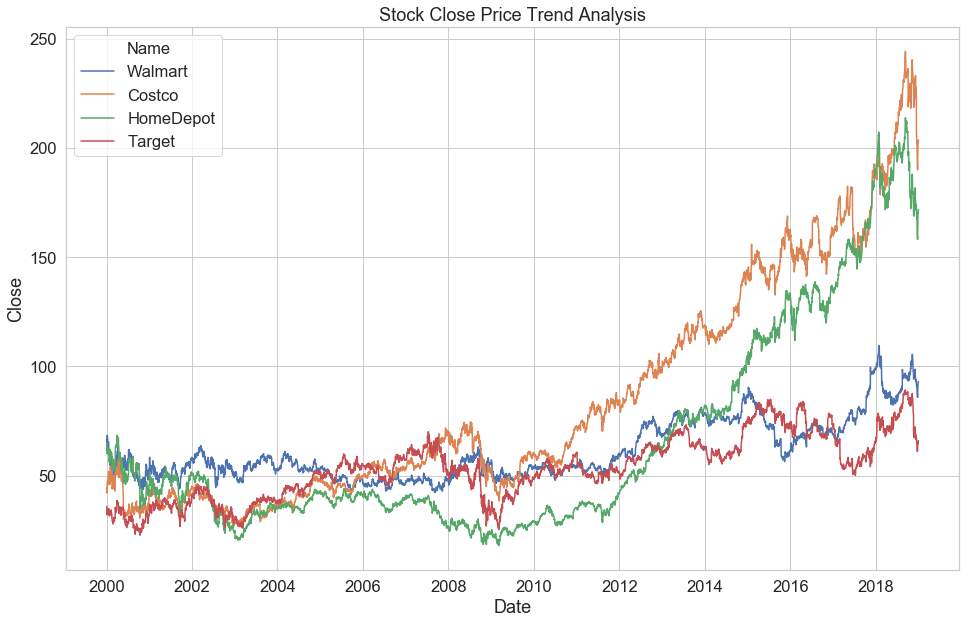

In [26]:
sns.lineplot(x=df.index, y=df.Close,hue=df.Name).set_title('Stock Close Price Trend Analysis')

## Using Bokeh to add interactions to above Line plot

In [29]:
from bokeh.plotting import figure, output_file, show, save


In [30]:
# Creating a figure with plot width and plot height , stating x axis as datimetime object
p1 = figure(x_axis_type="datetime",plot_width=1200, plot_height=600)

#Adding labels
p1.xaxis.axis_label = 'Year/Month'
p1.yaxis.axis_label = 'Close Price'

#adding a X variable instead of staing it 4 times
X_val = df_Walmart.index

#Plotting close price for different franchises and adding an interacting legend which can be muted by clicking on legend
p1.line(X_val,df_Walmart['Close'] , color='Blue', legend='Walmart',muted_color='Blue', muted_alpha=0.2)
p1.line(X_val,df_HomeDepot['Close'] , color='Green', legend='Home Depot',muted_color='Green', muted_alpha=0.2)
p1.line(X_val,df_Costco['Close'] , color='Brown', legend='Costco',muted_color='Brown', muted_alpha=0.2)
p1.line(X_val,df_Target['Close'] , color='Red', legend='Target',muted_color='Red', muted_alpha=0.2)
p1.legend.click_policy="mute"

#placing the legend on top left , adding title, improving the readability of plot
p1.legend.location = "top_left"
p1.title.text = 'Stock Close Price Trend Analysis'
p1.grid.grid_line_alpha= 0.5
p1.title.align = "center"
p1.title.text_font_size = "30px"

#saving 
output_file("stocks.html", title="stocks.py example")


save(p1)

'C:\\Users\\sindhuja\\Desktop\\Fall 19\\VA\\HW2\\stocks.html'

## Candlestick Plot To Analyse the Deatiled Trends of Each Frachise


In [31]:
def dataTransform(df_sample):
    df_sample['Average'] = (df_sample['Open']+df_sample['Close'])/2
    df_sample['Status'] = df_sample.Open < df_sample.Close
    df_sample['Change'] = abs(df_sample['Close'] - df_sample['Open'])
    df_sample = df_sample[df_sample.index.year == 2018]
    df_sample = df_sample[df_sample.index.month > 6]
    return df_sample

In [32]:
df_Walmart = dataTransform(df_Walmart)
df_HomeDepot = dataTransform(df_HomeDepot)
df_Costco = dataTransform(df_Costco)
df_Target = dataTransform(df_Target)

In [33]:
from bokeh.models import Panel, Tabs

In [34]:
## half day in ms
hours_12 = 12*60*60*1000

In [35]:
#Walmart Tab

# Creating a figure with plot width and plot height , stating x axis as datimetime object
t1 = figure(x_axis_type="datetime",plot_width=1350, plot_height=600)

#Adding labels
t1.xaxis.axis_label = 'Year/Month'

#placing the legend on top left , adding title, improving the readability of plot
t1.legend.location = "Center"
t1.title.text = 'Stock Trend Analysis - WALMART'
t1.grid.grid_line_alpha= 0.5
t1.title.align = "center"
t1.title.text_font_size = "25px"
t1.xaxis.major_label_orientation = 22/28


t1.segment(x0 = df_Walmart.index, y0= df_Walmart.Low, x1= df_Walmart.index, y1 = df_Walmart.High, color='Black')
t1.rect(x= df_Walmart[df_Walmart.Status==False].index, y= df_Walmart[df_Walmart.Status==False].Average, 
        width = hours_12, height = df_Walmart[df_Walmart.Status==False].Change, fill_color = 'Red', line_color='Black')
t1.rect(x= df_Walmart[df_Walmart.Status==True].index, y= df_Walmart[df_Walmart.Status==True].Average, 
        width = hours_12, height = df_Walmart[df_Walmart.Status==True].Change, fill_color = 'Green', line_color='Black')

tab1 = Panel(child=t1, title="Walmart")



In [36]:
# HomeDepot Tab

# Creating a figure with plot width and plot height , stating x axis as datimetime object
t2 = figure(x_axis_type="datetime",plot_width=1350, plot_height=600)

#Adding labels
t2.xaxis.axis_label = 'Year/Month'

#placing the legend on top left , adding title, improving the readability of plot
t2.legend.location = "Center"
t2.title.text = 'Stock Trend Analysis - HOME DEPOT'
t2.grid.grid_line_alpha= 0.5
t2.title.align = "center"
t2.title.text_font_size = "25px"
t2.xaxis.major_label_orientation = 22/28


t2.segment(x0 = df_HomeDepot.index, y0= df_HomeDepot.Low, x1= df_HomeDepot.index, y1 = df_HomeDepot.High, color='Black')
t2.rect(x= df_HomeDepot[df_HomeDepot.Status==False].index, y= df_HomeDepot[df_HomeDepot.Status==False].Average, 
        width = hours_12, height = df_HomeDepot[df_HomeDepot.Status==False].Change, fill_color = 'Red', line_color='Black')
t2.rect(x= df_HomeDepot[df_HomeDepot.Status==True].index, y= df_HomeDepot[df_HomeDepot.Status==True].Average, 
        width = hours_12, height = df_HomeDepot[df_HomeDepot.Status==True].Change,fill_color = 'Green', line_color='Black')

tab2 = Panel(child=t2, title="Home Depot")


In [37]:
#Costco Tab

# Creating a figure with plot width and plot height , stating x axis as datimetime object
t3 = figure(x_axis_type="datetime",plot_width=1350, plot_height=600)

#Adding labels
t3.xaxis.axis_label = 'Year/Month'


#placing the legend on top left , adding title, improving the readability of plot
t3.title.text = 'Stock Trend Analysis - COSTCO'
t3.grid.grid_line_alpha= 0.5
t3.title.align = "center"
t3.title.text_font_size = "25px"
t3.xaxis.major_label_orientation = 22/28


t3.segment(x0 = df_Costco.index, y0= df_Costco.Low, x1= df_Costco.index, y1 = df_Costco.High, color='Black')
t3.rect(x= df_Costco[df_Costco.Status==False].index, y= df_Costco[df_Costco.Status==False].Average, 
        width = hours_12, height = df_Costco[df_Costco.Status==False].Change, fill_color = 'Red', line_color='Black')
t3.rect(x= df_Costco[df_Costco.Status==True].index, y= df_Costco[df_Costco.Status==True].Average, 
        width = hours_12, height = df_Costco[df_Costco.Status==True].Change,fill_color = 'Green', line_color='Black')

tab3 = Panel(child=t3, title="Costco")


In [38]:
# Target Tab

# Creating a figure with plot width and plot height , stating x axis as datimetime object
t4 = figure(x_axis_type="datetime",plot_width=1350, plot_height=600)

#Adding labels
t4.xaxis.axis_label = 'Year/Month'


#placing the legend on top left , adding title, improving the readability of plot
t4.title.text = 'Stock Trend Analysis - TARGET'
t4.grid.grid_line_alpha= 0.5
t4.title.align = "center"
t4.title.text_font_size = "25px"
t4.xaxis.major_label_orientation = 22/28


t4.segment(x0 = df_Target.index, y0= df_Target.Low, x1= df_Target.index, y1 = df_Target.High, color='Black')
t4.rect(x= df_Target[df_Target.Status==False].index, y= df_Target[df_Target.Status==False].Average, 
        width = hours_12, height = df_Target[df_Target.Status==False].Change, fill_color = 'Red', line_color='Black')
t4.rect(x= df_Target[df_Target.Status==True].index, y= df_Target[df_Target.Status==True].Average, 
        width = hours_12, height = df_Target[df_Target.Status==True].Change,fill_color = 'Green', line_color='Black')

tab4 = Panel(child= t4, title="Target")


In [39]:

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4 ], sizing_mode='scale_width')


output_file("All_Franchise_CandleSticks.html", title="CandleStick.py example")

save(tabs)

'C:\\Users\\sindhuja\\Desktop\\Fall 19\\VA\\HW2\\All_Franchise_CandleSticks.html'

## NOTE:: There are significant differences in shapes in line plot and candle plot curves since the scales are different. 
## CandleStick plot has much detailed information and only for period July 2018 - Dec 2018. 
## Reason :: To visualize candlestick plot zooming in